In [78]:
import quandl
podatci = quandl.get("LME/PR_CO", authtoken="Bygw8KP9XWpisC6gGapq") #cijene kobalta
podatci.columns

Index(['Cash Buyer', 'Cash Seller & Settlement', '3-months Buyer',
       '3-months Seller', '15-months Buyer', '15-months Seller'],
      dtype='object')

promatrati ćemo stupac Cash Buyer te ćemo ogledati kako razlićiti regresijski modeli opisuju kretanje cijena kobalta

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

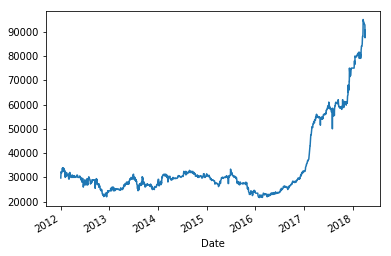

In [80]:
cijena = podatci["Cash Buyer"].as_matrix(columns= None)  #y vrijednosti
podatci["Cash Buyer"].plot()

odmah vidimo da regresija pravcem nece dobro opisivati podatke jer je cijena skoro stalno rasla od 2017 godine. Ali svejedno ćemo napraviti i regresiju pravcem jer ćemo je uspoređivati kasnije sa drugima

In [159]:
X = np.c_[np.ones(len(cijena)) , range(len(cijena)) ]
initTheta = np.array([0,0])


za računanje koeficjenata našeg modela trebati će nam dvije funkcije, jedna koja će računati koliko naš model dobro opisuje podatke koristeći sumu kvadratnog odstupanja, a druga će biti funkcija koja će gradijentnim spustom izračunati optimalnu vrijednost našeg parametra

In [82]:
def LinRegComputeCost(X ,y ,theta ):
    m = len(y)
    h = np.dot(X, theta)
    J = (1/(2*m)) * np.sum(np.power(h-y,2))
    return J

In [150]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_povijest = np.zeros(num_iters)
    for i in range(0, num_iters):
        h = np.dot(X,theta)
        grad = np.dot(X.transpose(), h-y)/m
        theta = theta - alpha*grad
        J_povijest[i] = LinRegComputeCost(X ,y ,theta)
    #   if i%30 == 0: print(J_povijest[i])
    return theta, J_povijest   

In [154]:
def particioniranje(X,y):
    m = X.shape[1]
    Xy = np.c_[X , y]
    Xyperm = np.random.permutation(Xy)
    X_train = Xyperm[ :int(0.7*len(X)), :m ]  #prvih 70%
    X_test = Xyperm[ int(0.7*len(X)):, :m ]
    y_train = np.multiply(Xyperm[ :int(0.7*len(X)), m ], 0.001)   # cijena u 1000 $
    y_test = np.multiply(Xyperm[ int(0.7*len(X)):, m ], 0.001)
    return X_train, X_test, y_train, y_test

In [84]:
br_iteracija = 1500
alpha = 0.01
X_train = X[ :int(0.7*len(X)), : ]  #prvih 70%
X_test = X[int(0.7*len(X)):, : ]
y_train = np.multiply(cijena[ :int(0.7*len(cijena))], 0.001)   # cijena u 1000 $
y_test = np.multiply(cijena[ int(0.7*len(cijena)): ], 0.001)
optimal_theta, J_history = gradientDescent(X_train, y_train, initTheta, 0.0000006, br_iteracija)
optimal_theta

array([0.00660349, 0.03786037])

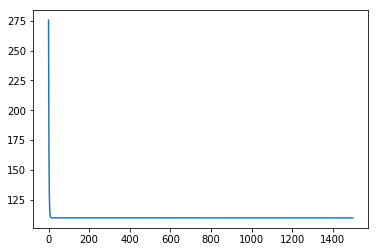

In [85]:
plt.plot(J_history)
plt.show()

vidimo da smo gradijentnim spustom našli približno optimalno rješenje

(2,)

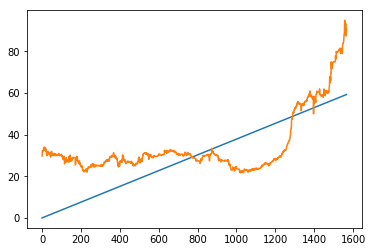

In [86]:
fig1, ax1 = plt.subplots()
ax1.plot(X[:,1], np.matmul(X,optimal_theta))
ax1.plot(X[:,1], cijena*0.001)
optimal_theta.shape

pametnije particioniranje skupa podataka je da ne uzimamo prvih 70% i zadnjih 30% nego kroz random permutacije

In [160]:
X2_train, X2_test, y2_train, y2_test = particioniranje(X, cijena)
optimal_theta2, J_history2 = gradientDescent(X2_train, y2_train, initTheta, 0.0000006, br_iteracija)
optimal_theta2

array([0.00408235, 0.03802267])

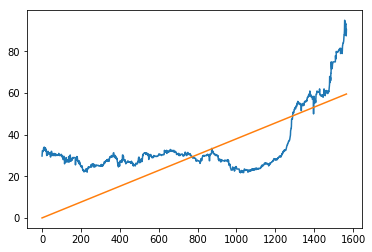

In [161]:
fig2, ax2 = plt.subplots()
ax2.plot(X[:,1], cijena*0.001)
ax2.plot(X[:,1], np.dot(X,optimal_theta2))

In [162]:
LinRegComputeCost(X,cijena*0.001,optimal_theta) - LinRegComputeCost(X,cijena*0.001,optimal_theta2) 

0.03140159624231842

razlika je praktički neprimjetna, no razlog tome je najviše to što dani podatci nisu prikladni za regresiju pravcem. zato nastavljamo sa polinomijalnom regresijom 

In [163]:
tempsqr = np.power(range(len(cijena)),2)
Xsqr = np.c_[X , tempsqr]
initTheta= np.array([0,0,0])
Xsqr_train, Xsqr_test, y_train, y_test = particioniranje(Xsqr, cijena)
optimal_theta3, J_history3 = gradientDescent(Xsqr_train, y_train, initTheta, 0.000000000001, br_iteracija)
optimal_theta3

array([1.48854563e-08, 3.27959518e-06, 3.01051761e-05])

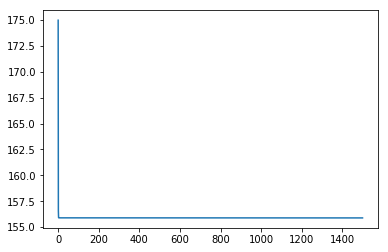

In [164]:
plt.plot(J_history3)    

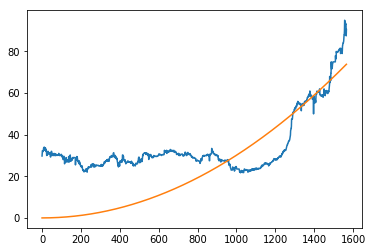

In [165]:
fig3, ax3 = plt.subplots()
ax3.plot(X[:,1], cijena*0.001)
ax3.plot(X[:,1], np.dot(Xsqr,optimal_theta3))

[ 4.83242111e-02 -5.49922398e+01  3.81106303e+04]


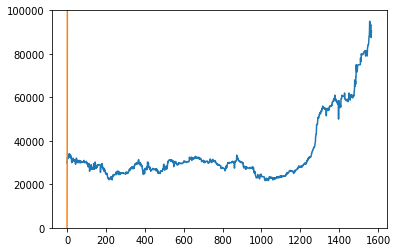

In [171]:
optimal_theta4 = np.polyfit(X[:,1],cijena, 2)
print(optimal_theta4)
fig4, ax4 = plt.subplots()
ax4.set(ylim=(0,100000) )
ax4.plot(X[:,1], cijena)
ax4.plot(X[:,1], np.dot(Xsqr,optimal_theta4))